In [1]:
import matplotlib.pyplot as plt
from numpy import *

In [2]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [3]:
class readfield:
    def __init__(self, filename):
        D_file = open(filename, 'r', encoding = 'utf8')
        n = -1
        m = 0
        Dtemp = []
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]):
                Dtemp[n].append([])
                Dtemp[n][m].extend([float(position) for position in split_line])
                m = m + 1
            else:
                Dtemp.append([])
                n = n + 1
                m = 0
        D_file.close()
        Dtemp = Dtemp[1]
        
        self.X = reshape([Dtemp[i][0] for i in range(len(Dtemp))],(81,81))
        self.Y = reshape([Dtemp[i][1] for i in range(len(Dtemp))],(81,81))
        self.Z = Dtemp[0][2]
        self.N = int(sqrt(len(self.X)))
        self.DX = reshape([Dtemp[i][3] for i in range(len(Dtemp))],(81,81)) + 1j*reshape([Dtemp[i][4] for i in range(len(Dtemp))],(81,81))
        self.DY = reshape([Dtemp[i][5] for i in range(len(Dtemp))],(81,81)) + 1j*reshape([Dtemp[i][6] for i in range(len(Dtemp))],(81,81))
        self.DZ = reshape([Dtemp[i][7] for i in range(len(Dtemp))],(81,81)) + 1j*reshape([Dtemp[i][8] for i in range(len(Dtemp))],(81,81))
        self.D = swapaxes(stack([self.DX, self.DY, self.DZ],axis=1),1,2)

In [4]:
class readarray:
    def __init__(self):
        ### X pol
        D_file = open('arrayX.txt', 'r', encoding = 'utf8')
        Dtemp = []
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        D_file = open('arrayX2.txt', 'r', encoding = 'utf8')
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        D_file = open('arrayX3.txt', 'r', encoding = 'utf8')
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        self.DX = reshape([Dtemp[i][1] + 1j*Dtemp[i][2] for i in range(len(Dtemp))],(8,8))
        
        ### Y pol
        D_file = open('arrayY.txt', 'r', encoding = 'utf8')
        Dtemp = []
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        D_file = open('arrayY2.txt', 'r', encoding = 'utf8')
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        D_file = open('arrayY3.txt', 'r', encoding = 'utf8')
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        self.DY = reshape([Dtemp[i][1] + 1j*Dtemp[i][2] for i in range(len(Dtemp))],(8,8))

        
        self.X, self.Y = meshgrid(linspace(0, 35, num=8), linspace(0, 35, num=8))
        self.Z = 2
        self.N = 8
        self.DZ = zeros((8,8))
        self.D = swapaxes(stack([self.DX, self.DY, self.DZ],axis=1),1,2)

In [5]:
Eanal = readfield('E.txt')
Hanal = readfield('H.txt')
Hanal.DX.shape

(81, 81)

In [6]:
arr = readarray()
arr.DX.shape

(8, 8)

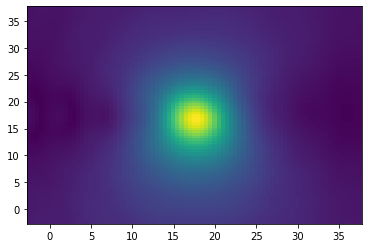

In [7]:
plt.pcolormesh(Eanal.X,Eanal.Y,abs(Eanal.DX),shading='auto')
plt.show()

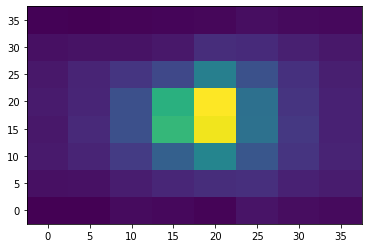

In [8]:
plt.pcolormesh(arr.X,arr.Y,flip(abs(arr.DX),axis = 1),shading='auto')
plt.show()

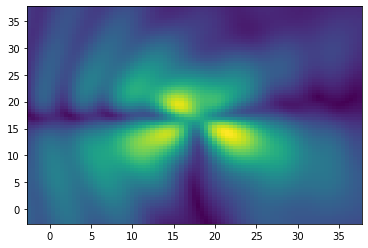

In [9]:
plt.pcolormesh(Eanal.X,Eanal.Y,abs(Eanal.DY),shading='auto')
plt.show()

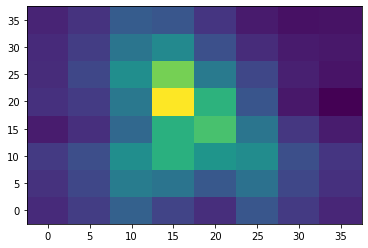

In [10]:
plt.pcolormesh(arr.X,arr.Y,flip(abs(arr.DY),axis = 1),shading='auto')
plt.show()

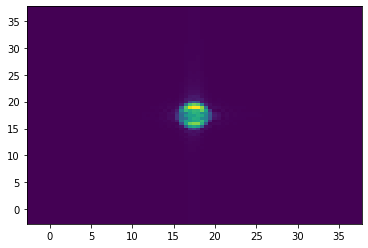

In [11]:
plt.pcolormesh(Eanal.X,Eanal.Y,abs(fft.fftshift(fft.fft2(fft.ifftshift(Eanal.DX)))),shading='auto')
plt.show()